In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import Model
import numpy as np

In [2]:
# I [1,0,0,0] work [0,1,0,0] at [0,0,1,0] google [0,0,0,1]
# I work at google = [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]
# I google at work = [[1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]]

train_data = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1],
                       [1,0,0,0],[0,0,0,1],[0,0,1,0],[0,1,0,0]], dtype=np.float32)
train_data.shape

(8, 4)

In [3]:
train_data = train_data.reshape(2,4,4) #(batch_size, timesteps, input_dim)
train_data.shape

(2, 4, 4)

In [4]:
rnn = SimpleRNN(units=3, return_sequences=False, return_state=False)
state = rnn(train_data)

print(f"state: {state}, shape: {state.shape}")

state: [[-0.6315477   0.42130172  0.47873357]
 [-0.46079856  0.8756897   0.36326572]], shape: (2, 3)


In [5]:
rnn = SimpleRNN(units=3, return_sequences=False, return_state=True)
state, last_state = rnn(train_data)

print(f"state: {state}, shape: {state.shape}")
print(f"last_state: {last_state}, shape: {last_state.shape}")

state: [[-0.5620855   0.39174464  0.19773683]
 [-0.7645133   0.34585324 -0.14921807]], shape: (2, 3)
last_state: [[-0.5620855   0.39174464  0.19773683]
 [-0.7645133   0.34585324 -0.14921807]], shape: (2, 3)


In [6]:
rnn = SimpleRNN(units=3, return_sequences=True, return_state=False)
state = rnn(train_data)

print(f"state: {state}, shape: {state.shape}")

state: [[[ 4.0514541e-01 -1.2253582e-01 -4.8448280e-01]
  [ 4.8072506e-02 -4.6502408e-01 -3.5184156e-02]
  [ 5.1127899e-01 -1.9685589e-01  5.6482810e-01]
  [-7.7793020e-01 -2.4718015e-01 -3.7953228e-01]]

 [[ 4.0514541e-01 -1.2253582e-01 -4.8448280e-01]
  [-6.0846800e-01 -5.5198109e-01  4.8805076e-01]
  [ 7.9681420e-01 -5.5362273e-04  9.9661620e-03]
  [-4.1424376e-01 -2.1386987e-01 -3.2576051e-01]]], shape: (2, 4, 3)


In [8]:
rnn = SimpleRNN(units=3, return_sequences=True, return_state=True)
state, last_state = rnn(train_data)

print(f"hidden_state: {state}, shape: {state.shape}")
print(f"last_state: {last_state}, shape: {last_state.shape}")

hidden_state: [[[ 0.01378675  0.49216217  0.4163194 ]
  [-0.6082076  -0.6740004   0.49002698]
  [ 0.38805607  0.7262444   0.3951058 ]
  [-0.43411148 -0.21561988 -0.2793135 ]]

 [[ 0.01378675  0.49216217  0.4163194 ]
  [-0.43127975  0.21908416 -0.26742095]
  [ 0.88172376  0.25139612  0.29330117]
  [-0.8150946  -0.88808894  0.00448534]]], shape: (2, 4, 3)
last_state: [[-0.43411148 -0.21561988 -0.2793135 ]
 [-0.8150946  -0.88808894  0.00448534]], shape: (2, 3)


In [13]:
inputs = Input(shape=(4,4))

output, state = SimpleRNN(units=3, return_sequences=True, return_state=True)(inputs)
model = Model(inputs=inputs, outputs=[output, state])

In [16]:
output, state = model.predict(train_data)

print("I work at google: ", output[0])
print("I google at work: ", output[1])

print("I work at google: state: ", state[0])
print("I google at work: state: ", state[1])

I work at google:  [[ 0.5813829  -0.28509516  0.49023116]
 [ 0.7510307   0.29287717 -0.17027882]
 [-0.12814267  0.7788541  -0.38663137]
 [-0.42990607  0.6748655  -0.7279593 ]]
I google at work:  [[ 0.5813829  -0.28509516  0.49023116]
 [-0.27588335  0.79704416  0.53142595]
 [ 0.3482082  -0.17515057 -0.5887883 ]
 [ 0.20187198  0.49092168 -0.73265517]]
I work at google: state:  [-0.42990607  0.6748655  -0.7279593 ]
I google at work: state:  [ 0.20187198  0.49092168 -0.73265517]


In [17]:
model.layers[1].weights[0] # 입력 값에 대한 가중치 행렬

<tf.Variable 'simple_rnn_6/simple_rnn_cell_6/kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.6645491 , -0.29321933,  0.53636456],
       [ 0.62343633, -0.02136737, -0.828775  ],
       [-0.4288808 ,  0.2849995 , -0.2850796 ],
       [-0.6350994 ,  0.7673769 , -0.06469101]], dtype=float32)>

In [18]:
model.layers[1].weights[1] # 이전 상태 값에 대한 가중치 행렬

<tf.Variable 'simple_rnn_6/simple_rnn_cell_6/recurrent_kernel:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.3150375 ,  0.9102697 ,  0.2686272 ],
       [ 0.6295099 ,  0.01140293, -0.77690876],
       [ 0.71025974, -0.4138587 ,  0.5694314 ]], dtype=float32)>

In [19]:
model.layers[1].weights[2] # bias 값

<tf.Variable 'simple_rnn_6/simple_rnn_cell_6/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# dataset 생성
data = np.cos(np.arange(0,100)*2) + np.random.random(100)

X = np.array([data[i+j] for i in range(len(data)-10) for j in range(10)])
y = np.array([data[i+10] for i in range(len(data)-10)])

X_train = X[:750].reshape(-1,10,1)
X_test = X[750:].reshape(-1,10,1)

y_train = y[:75].reshape(-1,1)
y_test = y[75:].reshape(-1,1)

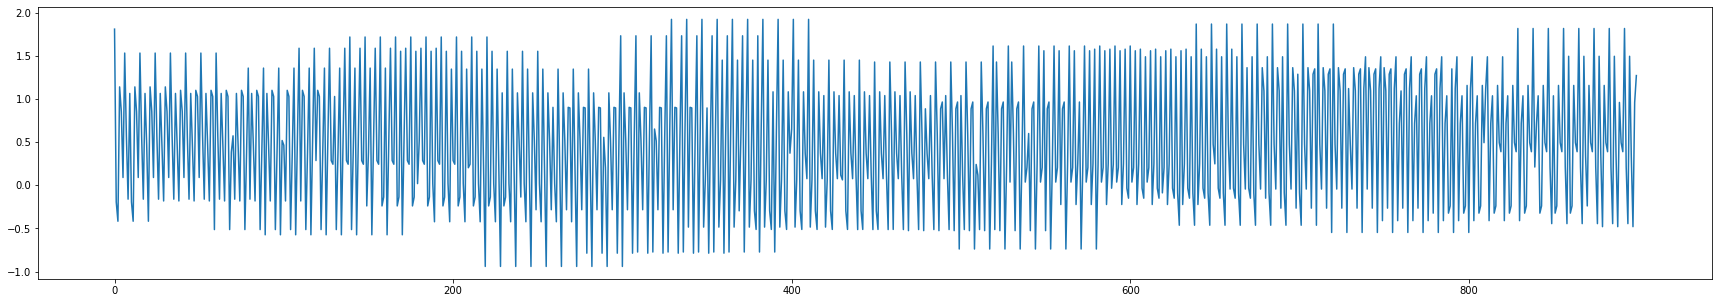

In [35]:
plt.figure(figsize=(30,5))
plt.plot(X)
plt.show()

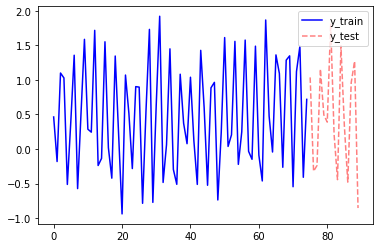

In [26]:
# graph plot
idx_train = np.arange(75)
idx_test = np.arange(75,90)

plt.plot(idx_train, y_train, color='blue', label='y_train')
plt.plot(idx_test, y_test, color='red', linestyle='--', alpha=0.5, label='y_test')
plt.legend(loc='upper right')
plt.show()

In [27]:
model = Sequential()
model.add(SimpleRNN(units=12, input_shape=(10,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=400, verbose=False)

In [29]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 12)                168       
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
y_predictions = model.predict(X_test)

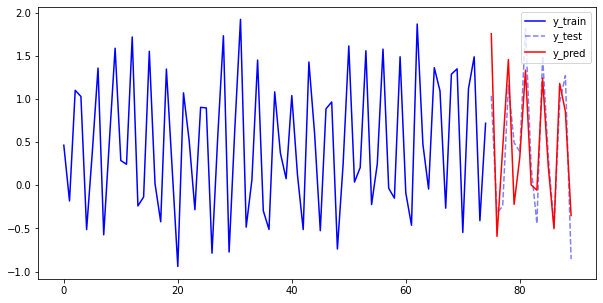

In [32]:
# graph plot
idx_train = np.arange(75)
idx_test = np.arange(75,90)

plt.figure(figsize=(10,5))
plt.plot(idx_train, y_train, color='blue', label='y_train')
plt.plot(idx_test, y_test, color='blue', linestyle='--', alpha=0.5, label='y_test')
plt.plot(idx_test, y_predictions, color='red', label='y_pred')
plt.legend(loc='upper right')
plt.show()